# 项目背景

[@dog_rates](https://twitter.com/dog_rates) 是著名的推特主, 其昵称为 WeRateDogs。该推特主维护着众多狗狗评分，受到四百多万人关注，曾受到国际媒体的报道。
本报告将会收集与之相关的三个数据集，并对其进行分析。遗憾的是，这三个数据集在内容和结构方面都存在一些缺陷，其中一个数据集已经过初步清洗，但清洗不充分，存在很多错误。本报告的目标是：收集这三个数据集，对其进行充分的评估和清洗，并提出几个问题，最后通过可视化或其他手段进行解答。

In [1]:
import numpy as np
import pandas as pd
import json
import requests
import re
import matplotlib.pyplot as plt
%matplotlib inline

# 收集

我们需要收集三个数据集：
* WeRateDogs基本数据集，推主提供，属于已有资料，csv文件格式
* 通过API获取的包含转发数和喜欢数的附加数据集，json格式的txt文件
* 根据图片预测狗狗品种的神经网络数据集，csv文件

#### WeRateDogs基本数据集
数据集为平面文件csv，这个很容易处理，用pandas.read_csv处理即可，然后取头5行查看是否正常：

In [2]:
df_basic = pd.read_csv('twitter-archive-enhanced.csv')
df_basic.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 附加数据

附加数据以JSON格式保存在文件 'tweet_json.txt' 中：

In [3]:
extra_data = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        extra_data.append(json.loads(line.strip()))
df_extra = pd.DataFrame(extra_data)
df_extra.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


这里我们最感兴趣的是`favorite_count`（喜欢数）、`retweet_count`（转发数）这两列数据，因此只保留这两列数据，另加`id`列用于连接其他数据集。

In [4]:
df_extra = df_extra[['id', 'favorite_count', 'retweet_count']]
df_extra.head()

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


#### 狗狗品种预测数据 

该数据存储在下方所示url中，需要下载后保存到本地文件中：

In [5]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

file_name = url.split('/')[-1]
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [6]:
df_pred = pd.read_csv(file_name, sep='\t')
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# 评估
经过一系列数据收集操作，我们得到三个数据集：
* `df_basic`：WeRateDogs基本数据集
* `df_extra`：附加数据
* `df_pred`：狗狗品种预测数据

对每个数据集，我们将通过目测和编码方式进行评估。

#### df_basic
首先取一个容量为50的随机样本进行观察：

In [7]:
df_basic.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,None,None,None,None
348,831670449226514432,NaN,NaN,2017-02-15 01:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831670449...,13,10,Daisy,None,None,None,None
2203,668641109086707712,NaN,NaN,2015-11-23 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hanz. He heard some thunder. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668641109...,10,10,Hanz,None,None,None,None
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861288531...,13,10,None,None,None,None,None
329,833479644947025920,NaN,NaN,2017-02-20 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Poppy. She just arrived. 13/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833479644...,13,10,Poppy,None,None,None,None
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
390,826240494070030336,NaN,NaN,2017-01-31 01:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826240494...,11,10,None,None,None,None,None
2075,670840546554966016,NaN,NaN,2015-11-29 05:43:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Colby. He's that one cool friend that get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546...,10,10,Colby,None,None,None,None
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,None,None,None,None
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,9,10,very,None,None,None,None


观察发现该表存在以下数据质量问题：
* 许多列存在缺失值，如：`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`retweeted_status_timestamp`
* `name`列存在异常值如'None'、'the'、'a'等
* 代表狗狗地位的几列存在缺失值
* `rating_numerator`列存在低异常值

以及以下数据结构问题：
* 'doggo'、'floofer'、'pupper'、'puppo'是变量值，而非变量，不应存储为四列

接下来继续执行几段代码进行进一步评估：

In [8]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

观察到到该表存在以下数据质量问题：
* `expanded_urls`列存在少量缺失数据。目测评估时因为是部分取样没有观察到这一点
* `timestamp`的时间戳数据为字符串格式，这样不利于时间数据的处理
* `tweet_id`应为字符串格式，因为不会对其进行计算
* `retweeted_status_id`列的非空值指示存在转发数
* `expanded_urls`列的缺失值指示存在图片链接缺失

In [9]:
df_basic.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


观察到该表存在以下数据质量问题：
* `rating_numerator`和`rating_denominator`列存在高/低异常值。如`rating_numerator`最低得分0分，最高得分2356分。

In [10]:
((df_basic[['doggo', 'floofer', 'pupper', 'pupper']] != 'None').sum(axis=1) > 1).sum()

258

观察到该表存在以下数据质量问题：
* 狗狗地位存在对应多种类型的情况

In [11]:
for url in df_basic['expanded_urls']:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/phot

观察到该数据集存在以下质量问题：
* `expanded_urls`列存在链接重复，如某些记录有多条一模一样的链接

In [12]:
for text in df_basic['text'].sample(5):
    print(text + '/n')

Here we see one dog giving a puptalk to another dog. Both are focused af. Left one has powerful feet. 11/10 for both https://t.co/fUacc13OrW/n
This is Raphael. He is a Baskerville Conquistador. Entertains at all the gatherings. 10/10 simply magnificent https://t.co/3NTykJmtHt/n
This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P/n
When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe/n
Oh boy what a pup! Sunglasses take this one to the next level. Weirdly folds front legs. Pretty big. 6/10 https://t.co/yECbFrSArM/n


观察到该数据集的一个结构问题：
* `text`列的推文内容与推文链接混杂在一起

另外，在`source`列中看到一些html元素，我很好奇这一列要传达什么信息，来看一下：

In [13]:
df_basic['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

这一列应该是描述了用户的发推渠道，如客户端、Vine、网页端等。但无需记录整个元素，只需要该元素的内容即可，因此该表存在以下质量问题：
* `source`列包含了整个<a\>元素，实际上只需要<a\>元素的内容即可

#### df_extra

对此表及下一个表，依然是先目测评估，再编码评估：

In [14]:
df_extra.head()

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


In [15]:
df_extra.sample(10)

,id,favorite_count,retweet_count
2144,669749430875258880,287,71
208,851953902622658560,0,10647
1749,678800283649069056,2800,1014
1702,680805554198020098,2357,745
771,776218204058357768,33209,18343
240,846139713627017216,33099,10908
313,834931633769889797,11791,1872
714,783695101801398276,11595,3706
109,871102520638267392,21403,5729
455,817908911860748288,5337,902


In [16]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
df_extra.describe()

,id,favorite_count,retweet_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,8109.198980,3134.932398
std,6.846210e+16,11980.795669,5237.846296
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,1417.000000,618.000000
50%,7.193536e+17,3596.500000,1456.500000
75%,7.991219e+17,10118.000000,3628.750000
max,8.924206e+17,132318.000000,79116.000000


In [18]:
df_extra.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

这个数据集中的数据质量问题：
* `id`列应为字符串对象，因为不会对其进行计算

有以下数据结构问题：
* 研究对象与`df_basic`相同，应该与之合并

#### df_pred

In [19]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1966,867774946302451713,https://pbs.twimg.com/media/DAr0tDZXUAEMvdu.jpg,2,Border_collie,0.661953,True,Cardigan,0.175718,True,collie,0.087142,True
1524,788178268662984705,https://pbs.twimg.com/media/CvAr88kW8AEKNAO.jpg,2,Samoyed,0.735480,True,Pomeranian,0.075101,True,Arctic_fox,0.036072,False
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False
1550,793120401413079041,https://pbs.twimg.com/media/CwG6zDfWcAA8jBD.jpg,1,Labrador_retriever,0.724944,True,golden_retriever,0.169744,True,kuvasz,0.035502,True
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
1773,828011680017821696,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True
676,683462770029932544,https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,1,Italian_greyhound,0.399560,True,whippet,0.267153,True,German_short-haired_pointer,0.081319,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
919,701889187134500865,https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg,1,French_bulldog,0.902856,True,Staffordshire_bullterrier,0.022634,True,soap_dispenser,0.011973,False
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True


In [21]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
df_pred['jpg_url'].duplicated().sum()

66

该数据集存在以下数据质量问题：
* `tweet_id`列应为字符串对象，因为不会对其进行计算
* `jpg_url`列存在重复值
* 观察数少于`df_basic`表，合并后可能有缺失值

以及以下数据结构问题：
* 研究对象和`df_basic`一致，应与之合并

# 评估总结


总结一下数据集中存在的问题：
### 质量问题
#### df_basic表
* 许多列存在缺失值，如：`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`retweeted_status_timestamp`
* `rating_numerator`和`rating_denominator`列存在异常值。
* `source`列包含了整个<a\>元素，实际上只需要<a\>元素的内容即可
* `timestamp`的时间戳数据为字符串格式
* `name`列狗狗的名称有不正确的，如'a'、'the'等
* 狗狗地位信息存在缺失，且存在对应多种类型的情况
* `tweet_id`应为字符串格式，因为不会对其进行计算
* `retweeted_status_id`列的非空值指示存在转发数据
* `expanded_urls`列的缺失值指示存在图片链接缺失

#### df_extra表
* `id`列应为字符串对象，因为不会对其进行计算

#### df_pred表
* `jpg_url`列存在重复值
* `tweet_id`列应为字符串对象，因为不会对其进行计算


### 结构问题
* `df_basic_clean`表中`text`列的推文内容与推文链接混杂在一起
* `df_basic`表的'doggo'、'floofer'、'pupper'、'puppo'是变量值，而非变量，不应存储为四列
* 三个数据集观察同类数据，应合并为一个表


# 清洗

为了达到数据分析的要求，需要对存在内容质量问题和结构问题的数据集进行清洗。在这个部分，我们首先处理单个数据集的数据缺失和重复值问题，然后处理数据集结构问题，最后处理数据集的内容质量问题。

首先获取每个数据集的copy：

In [24]:
df_basic_clean = df_basic.copy()
df_extra_clean = df_extra.copy()
df_pred_clean = df_pred.copy()

#### 处理单个数据集的缺失值
* df_basic_clean表里`in_reply_to_status_id`、`in_reply_to_user_id`、`retweeted_status_id`、`retweeted_status_user_id`、`retweeted_status_timestamp`存在大量缺失值，这几列并没有我们关心的信息，直接删除即可；`expanded_urls`列的缺失值也可以在这里过滤掉：

In [25]:
df_basic_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
df_basic_clean = df_basic_clean[df_basic_clean['expanded_urls'].notnull()]

In [26]:
#检查
#`retweeted_status_id`还有用，后面处理
df_basic_clean.isnull().sum()

tweet_id                  0
timestamp                 0
source                    0
text                      0
retweeted_status_id    2117
expanded_urls             0
rating_numerator          0
rating_denominator        0
name                      0
doggo                     0
floofer                   0
pupper                    0
puppo                     0
dtype: int64

#### 处理单个数据集的重复值
* `df_pred_clean`的`jpg_url`列的重复值处理

In [27]:
df_pred_clean = df_pred_clean[df_pred_clean['jpg_url'].duplicated() == False]

In [28]:
#检查
df_pred_clean['jpg_url'].duplicated().sum()

0

#### 处理数据集结构问题

* 将三个表合并为一个表

In [29]:
df_basic_clean = df_basic_clean.merge(df_pred_clean, how='inner', left_on='tweet_id', right_on='tweet_id').merge(df_extra_clean, how='left', left_on='tweet_id', right_on='id')
df_basic_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,39492,8842
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,33786,6480
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,25445,4301
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,42863,8925
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,41016,9721


In [30]:
df_basic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 27 columns):
tweet_id               2009 non-null int64
timestamp              2009 non-null object
source                 2009 non-null object
text                   2009 non-null object
retweeted_status_id    15 non-null float64
expanded_urls          2009 non-null object
rating_numerator       2009 non-null int64
rating_denominator     2009 non-null int64
name                   2009 non-null object
doggo                  2009 non-null object
floofer                2009 non-null object
pupper                 2009 non-null object
puppo                  2009 non-null object
jpg_url                2009 non-null object
img_num                2009 non-null int64
p1                     2009 non-null object
p1_conf                2009 non-null float64
p1_dog                 2009 non-null bool
p2                     2009 non-null object
p2_conf                2009 non-null float64
p2_dog            

* 将`df_basic_clean`表中`text`列的推文内容与推文链接分隔开

In [31]:
df_basic_clean['tweet_urls'] = df_basic_clean['text'].str.extract('(http.*)')
df_basic_clean['text'] = df_basic_clean['text'].str.replace('(http.*)', '')

In [32]:
#检查
df_basic_clean['tweet_urls'].sample(10)

1175    https://t.co/LCA6Fr3X2M
578     https://t.co/wdgY9oHPrT
1504    https://t.co/06oZdehGEa
260     https://t.co/nqAJGCHKEt
408     https://t.co/qTRY2qX9y4
321     https://t.co/liJGwMp17E
102     https://t.co/yeaH8Ej5eM
375     https://t.co/rvSANEsQZJ
1623    https://t.co/GpSkpN8kXS
288     https://t.co/HKBVZqXFNR
Name: tweet_urls, dtype: object

In [33]:
#检查
for text in df_basic_clean['text'].sample(10):
    print(text)

This is Clarence. His face says he doesn't want to be a donkey, but his tail is super pumped about it. 9/10 
This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 
When the photographer forgets to tell you where to look... 10/10 
This is Crumpet. He underestimated the snow. Quickly retreating. 10/10 
Happy Wednesday here's a pup wearing a beret. 12/10 please enjoy 
This is Reese. He's a Chilean Sohcahtoa. Loves to swing. Never sure what to do with his feet. 12/10 huggable af 
This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 
Meet Wafer. He represents every fiber of my being. 13/10 very good dog 
Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 
This is Baxter. He's very calm. Hasn't eaten in weeks tho. Not good at fetch. Never blinks. 8/10 would still pet 


* 重新获取`df_basic_clean`中狗狗地位，将结果保存为一列

考虑到狗狗地位识别结果可能存在的错误，我们重新获狗狗地位数据。另外调查可发现狗狗地位对应多种类型的情况都是因为文本中提到了多种类型（比如推文中出现两只狗狗，一个为doggo，一个为pupper）。由于自然语境的复杂性，直接过滤掉这部分数据是一个比较经济的做法。

In [34]:
#先删除原四列
df_basic_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

position = df_basic_clean['text'].str.findall('(doggo|floofer|pupper|puppo)')
df_basic_clean['position'] = position[position.str.len() <= 1].str[0].fillna('Position not mentioned')

In [35]:
#检查
df_basic_clean['position'].value_counts()

Position not mentioned    1680
pupper                     216
doggo                       66
puppo                       26
floofer                      3
Name: position, dtype: int64

#### 处理数据质量问题

* 将`expanded_urls`列的链接去重

In [36]:
#该函数对以逗号分隔多个子串的字符串进行去重
def filter_duplicates(x):
    filtered = set(x.split(','))
    for element in filtered:
        filtered_str = element + ','
    return filtered_str.rstrip(',')

df_basic_clean['expanded_urls'] = df_basic_clean['expanded_urls'].apply(filter_duplicates)

In [37]:
#检查：应为0
(df_basic_clean['expanded_urls'].apply(lambda x : x.split(',')) != df_basic_clean['expanded_urls'].apply(lambda x : list(set(x.split(','))))).sum()

0

* 处理`rating_numerator`和`rating_denominator`列的异常值

调查以下出现这种情况的原因：

In [38]:
#调查rating_denominator列
df_basic_clean[df_basic_clean['rating_denominator'] != 10]['tweet_urls']

332                             https://t.co/NIYC820tmd
394     https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
673                             https://t.co/HmwrdfEfUE
812                             https://t.co/XAVDNDaVgQ
860                             https://t.co/yGQI3He3xv
903                             https://t.co/eV1diwds8a
937                             https://t.co/Kky1DPG4iq
958                             https://t.co/mpvaVxKmc1
983                             https://t.co/0eb7R1Om12
1001                            https://t.co/sedre1ivTK
1067                            https://t.co/9dpcw6MdWa
1143                            https://t.co/HppvrYuamZ
1315                            https://t.co/kRK51Y5ac3
1316                            https://t.co/1zfnTJLt55
1341                            https://t.co/7EsP8LmSp5
1448                            https://t.co/ZanVtAtvIq
1507                            https://t.co/y93p6FLvVw
1988                            https://t.co/d9N

In [39]:
#调查rating_numerator列
IQR = df_basic_clean['rating_numerator'].describe()['75%'] - df_basic_clean['rating_numerator'].describe()['25%']
norm = df_basic_clean['rating_numerator'].describe()['25%'] - 1.5 * IQR, df_basic_clean['rating_numerator'].describe()['75%'] + 1.5 * IQR
for url in df_basic_clean[(df_basic_clean['rating_numerator'] > norm[1]) | (df_basic_clean['rating_numerator'] < norm[0])]['tweet_urls']:
    print(url)

https://t.co/qjrljjt948
https://t.co/DkOBbwulw1
https://t.co/YbEJPkg4Ag
https://t.co/NIYC820tmd
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
https://t.co/yBO5wuqaPS
https://t.co/ELqelxWMrC
https://t.co/QFaUiIHxHq
https://t.co/pL7wbMRW7M
https://t.co/4gOv2Q3iKP
https://t.co/HmwrdfEfUE
https://t.co/mOmnL19Wsl
https://t.co/u2c9c7qSg8
https://t.co/GRXwMxLBkh
https://t.co/z5bAdtn9kd
https://t.co/L3U0j14N5R
https://t.co/c7WXaB2nqX
https://t.co/rRULp7XFnO
https://t.co/yGQI3He3xv
https://t.co/rXvcElhoog
https://t.co/eV1diwds8a
https://t.co/FmxOpf2Sgl
https://t.co/Kky1DPG4iq
https://t.co/3oeFfHjv0Z
https://t.co/mpvaVxKmc1
https://t.co/o2GvskrhHt
https://t.co/wcwoGOkZvz
https://t.co/0eb7R1Om12
https://t.co/sedre1ivTK
https://t.co/xOrUyj7K30
https://t.co/FMUxir5pYu
https://t.co/9dpcw6MdWa
https://t.co/LUFnwzznaV
https://t.co/ALO02IAKCn
https://t.co/UtFI7eUCjE
https://t.co/ZJnCxlIf62
https://t.co/VfLoDZecJ7
https://t.co/HppvrYuamZ
https://t.co/uaJmNgXR2P
https://t.co/vityMwPKKi
https://t.co/fSh

观察发现这两列存在异常值的原因为推主调侃（如一窝5只狗狗则评分基准为50、非狗狗或cosplay狗狗给出低评分、纪念独立日将狗狗评分设置为1776等）或数据抓取失误（如错误抓取连锁超市7/11、日期9/11，浮点数评分抓取失败等），还有一些奇怪的基数存在（24/7表示24小时7天）等。下面再重新获取下评分，将有以下获取标准：
1. 获取评分基数为10或10的整数倍的评分，将10的整数倍（倍数>1）的评分进行平均处理；
2. 浮点数和整数评分都要获取到；
3. 过大或过小的评分也要获取。这些是真实存在的异常值，在进行分析时再进行处理。

In [40]:
#获取评分
clean_score = df_basic_clean['text'].str.extract('(\d\d*\.{0,1}\d*)\/(\d{1,2}0)')
clean_score[1].value_counts()

10     1994
50        3
80        2
90        1
150       1
110       1
130       1
120       1
20        1
40        1
170       1
70        1
Name: 1, dtype: int64

In [41]:
#处理基数为10的整数倍（倍数>1）的评分
df_basic_clean['rating_numerator'],  df_basic_clean['rating_denominator']= clean_score[0].astype(float).values * 10 / clean_score[1].astype(float).values, 10

In [42]:
#过滤掉未匹配的评分
df_basic_clean = df_basic_clean[df_basic_clean['rating_denominator'].notnull()]
df_basic_clean = df_basic_clean[df_basic_clean['rating_numerator'].notnull()]

In [43]:
#检查
df_basic_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2008.000000,2008.0
mean,11.645807,10.0
std,40.497919,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


* 提取`source`列中元素内容并舍弃其余部分

In [44]:
df_basic_clean['source'] = df_basic_clean['source'].str.replace('<.*">', '').str.replace('<.*>', '')

In [45]:
#检查
df_basic_clean['source'].value_counts()

Twitter for iPhone    1967
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

* 将`timestamp`列时间戳数据改为字符串格式

In [46]:
df_basic_clean['timestamp'] = pd.to_datetime(df_basic_clean['timestamp'])

In [47]:
#检查
df_basic_clean['timestamp'].dtype

dtype('<M8[ns]')

* 重新提取`name`列狗狗的名称

狗狗的名称需要在推文中提取。有的推文中并没有出现狗狗名称，而提到狗狗名字的推文有一定模式。观察以下代码的输出：

In [48]:
#将该代码框反复运行几次，以观察足够多的模式
for text in df_basic_clean['text'].sample(200):
    print(text + '/n')

Say hello to Lily. She's not injured or anything. Just wants everyone to hear her. 9/10 clever af /n
This is Jessifer. She is a Bismoth Teriyaki. Flowers being attacked by hurricanes on bandana (rad). 9/10 stellar pup /n
Say hello to Lupe. This is how she sleeps. 10/10 impressive really /n
Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 /n
RT @KennyFromDaBlok: 14/10 h*ckin good hats. will wear daily @dog_rates /n
This is Meyer. He has to hold somebody's hand during car rides. He's also wearing a seatbelt. 12/10 responsible af /n
This is Rolf. He's having the time of his life. 11/10 good pupper /n
This is Rizzo. He has many talents. A true renaissance doggo. 13/10 entertaining af /n
This is Django. He accidentally opened the front facing camera. Did him quite the frighten. 12/10 /n
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 /n
This is Glacier. He

观察得知，狗狗名字一般出现在'This is'、'Meet'、'Say hello to'、'Here is'之后。下面用正则表达式去匹配这个模式，同时要注意避免匹配到'a'、'an'、'the'等冠词和其他一些并不指代名字的词：

In [49]:
pattern = re.compile(r"(?:(?<=This\sis)|(?<=Meet)|(?<=Say\shello\sto)|(?<=Here\sis))\s((?!\ba\b|\ban\b|\bthe\b|\bquite\b)\w+)", flags=re.I)
name_col = df_basic_clean['text'].apply(lambda x : pattern.findall(x))
# 此处正则表达式主要参考：
# https://deerchao.net/tutorials/regex/regex.htm#lookaround
# https://stackoverflow.com/questions/20089922/python-regex-engine-look-behind-requires-fixed-width-pattern-error

此时仍然有可能匹配到不符合要求的词，比如这几个列表的第二个元素显然不是名字：

In [50]:
name_col[name_col.str.len() > 1]

408       [Ollie, very]
610       [Carbon, his]
1138    [Carter, plain]
1322        [Lupe, how]
Name: text, dtype: object

但在这个例子里，获取名字的任务算是完成了，只需再进行下面这一步：

In [51]:
df_basic_clean['name'] = name_col.str[0].fillna('Name not mentioned')

需要说明的是，原数据中也许还是存在没有注意到的模式，但是经过反复观察多个样本，上面的操作已经能够覆盖数据的绝大多数情况。

In [52]:
#检查
df_basic_clean['name'].value_counts()

Name not mentioned    621
Charlie                11
Lucy                   10
Oliver                 10
Cooper                 10
Tucker                  9
Penny                   9
Winston                 8
Sadie                   8
Toby                    7
Daisy                   7
Lola                    7
Koda                    6
Jax                     6
Bella                   6
Stanley                 6
Bo                      6
Leo                     5
Milo                    5
Dave                    5
Scout                   5
Rusty                   5
Chester                 5
Buddy                   5
Oscar                   5
Bailey                  5
Louis                   5
Derek                   4
Sophie                  4
Gus                     4
                     ... 
Zeek                    1
Fynn                    1
Jackie                  1
Gromit                  1
Harry                   1
Brudge                  1
Gidget                  1
Dietrich    

* 过滤掉`retweeted_status_id`列指示的转发数据

In [53]:
df_basic_clean = df_basic_clean[df_basic_clean['retweeted_status_id'].isnull()]

In [54]:
#检查：应为0
df_basic_clean['retweeted_status_id'].notnull().sum()

0

In [55]:
#删除多余列
df_basic_clean.drop(columns=['retweeted_status_id'], inplace=True)

* `tweet_id`列数据改为字符串格式

In [56]:
df_basic_clean['tweet_id'] = df_basic_clean['tweet_id'].astype('object')

In [57]:
#检查
df_basic_clean['tweet_id'].dtype

dtype('O')

最后，将清洗完毕的表保存到csv文件中：

In [58]:
df_basic_clean.to_csv('dogrates.csv', index=False)

# 分析与可视化

在这个部分我将提出几个感兴趣的问题，通过数据对其进行解答，必要的时候还会将其转化为可视化图表。这里需要说明的是，下面分析和可视化所依据的数据是建立在之前评估和清理的基础上的。

下面是要研究的问题：
1. 在@WeRateDogs推文中，哪些词出现的次数较多？
2. 推主对狗狗的评分集中在哪个区间？
3. 推主推文中哪种地位狗狗的评分较高？

#### 在@WeRateDogs推文中，哪些词出现的次数较多？

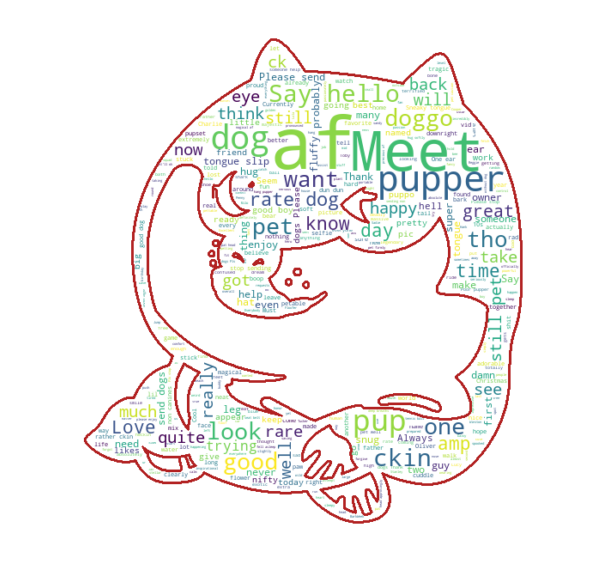

In [59]:
from PIL import Image
from wordcloud import WordCloud

#获取文本
texts = " ".join(text for text in df_basic_clean['text'])

#导入背景图片
mask = np.array(Image.open("lookthatdog.png"))

#绘图
wc = WordCloud(background_color="white", max_words=1000, mask=mask, contour_width=3, contour_color='firebrick').generate(texts)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
wc.to_file('result.png')
#此处参考：https://www.datacamp.com/community/tutorials/wordcloud-python

可以看到，推文中出现较多的词有：'Meet'、'dog'、'pupper'、'af'、'pup'等。

#### 推主对狗狗的评分集中在哪个区间？

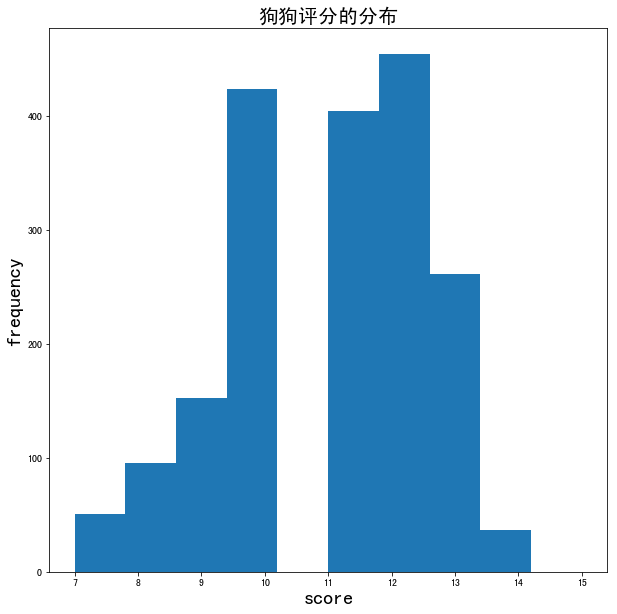

In [60]:
fig = plt.figure(figsize=[10, 10])
ax1 = fig.add_subplot(1, 1, 1)
plt.hist(df_basic_clean['rating_numerator'], range=(df_basic_clean['rating_numerator'].describe()['25%'] - 1.5 * IQR, df_basic_clean['rating_numerator'].describe()['75%'] + 1.5 * IQR))
ax1.set_xlabel('score', fontsize=20)
ax1.set_ylabel('frequency', fontsize=20)
ax1.set_title('狗狗评分的分布', fontsize=20)
plt.savefig('rate.png');

由上图看到，狗狗评分集中在10分、11-12分之间。9分以下、14分以上的评分就比较少了。

####  推主推文中哪种地位狗狗的评分较高？

In [61]:
doggo_rate = df_basic_clean['rating_numerator'][df_basic_clean['position'] == 'doggo']
floofer_rate = df_basic_clean['rating_numerator'][df_basic_clean['position'] == 'floofer']
pupper_rate = df_basic_clean['rating_numerator'][df_basic_clean['position'] == 'pupper']
puppo_rate = df_basic_clean['rating_numerator'][df_basic_clean['position'] == 'puppo']

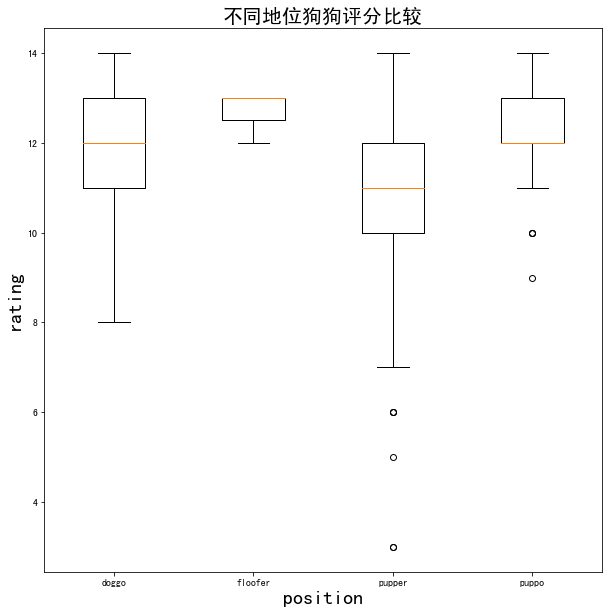

In [62]:
fig3 = plt.figure(figsize=[10, 10])  
ax3 = fig3.add_subplot(1, 1, 1) 

plt.boxplot([doggo_rate, floofer_rate, pupper_rate, puppo_rate], labels=['doggo', 'floofer', 'pupper', 'puppo'])
ax3.set_xlabel('position', fontsize=20)
ax3.set_ylabel('rating', fontsize=20)
ax3.set_title('不同地位狗狗评分比较', fontsize=20)
plt.savefig('pos_rate.png');

从图中看到：
1. floofer 平均得分最高（但 floofer 记录数很少），其次是 doggo ，pupper 记录数最高，得分也最少
1. puppo 的25%分位数和中位数重合，说明大量该地位狗狗拿到了同一评分
3. pupper 评分变异程度最高，floofer 评分变异程度最低

此外还可以观察到其他的现象，但需要指出的是，由于有地位记录的狗狗数量较少且不均衡（floofer有4个，pupper有248个），以上结论可能会有偏颇。同样的思路在数据充足的情况下解释能力更好。

最后总结下前面提出的问题：
* 在@WeRateDogs推文中，哪些词出现的次数较多？
    * 推文中出现较多的词有：'Meet'、'dog'、'pupper'、'af'、'pup'等。
* 推主对狗狗的评分集中在哪个区间？
    * 狗狗评分集中在10分、11-12分之间。9分以下、14分以上的评分就比较少了。
* 推主推文中哪种地位狗狗的评分较高？
    * floofer 平均得分最高（但 floofer 记录数很少），其次是 doggo ，pupper 记录数最高，得分也最少。当数据量变大时，此结论可能有变动。